# Assignment 2

by YaoMin(Allen) Zhang

## Goals
1. To develop your version K-Means using the algorithm specified below. (This has been an interview question for jobs using machine learning.)
2. To compare the performance of different implementations.
3. To demonstrate your understanding of clustering algorithms like K-Means, DBSCAN and Hierarchical. (This will also start introducing you to skills needed for data challenges.)
4. To extend the functionality of the developed K-Means implementation through additional parameters. (This shows your ability to develop novel or custom algorithms.)



## Step 1: Develop K-Means

I use np.random.seed() function to generate random indexes to get centroids. I tried several numbers and chose 6 as the seed number to make sure the random number is the same as the example in the assignment.

## Step 2: Performance Comparison

## Prepare Data
To generate 700 instances of data points in 2-dimensional space, with each of the instances belonging to one of 4 clusters. The coordinates for the instances are returned as X.
The cluster assignments are returned as cluster_assignments.

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as SKLearnKMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:

# Generate data
X, cluster_assignments = make_blobs(n_samples=700, centers=4,
cluster_std=0.60 , random_state=0)

In [3]:
X

array([[-0.84177847,  7.86655225],
       [-1.21515296,  8.01484649],
       [ 1.84320847, -0.07222085],
       ...,
       [-1.83141457,  2.2867542 ],
       [-1.84639796,  3.30491543],
       [ 0.28256062,  4.77250619]])

In [4]:
cluster_assignments

array([3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 0, 1, 3, 1, 2, 0, 0, 3, 1, 3, 1, 1,
       2, 1, 2, 3, 0, 2, 2, 2, 2, 0, 3, 0, 1, 3, 3, 1, 1, 0, 0, 1, 1, 2,
       1, 3, 3, 0, 3, 1, 0, 3, 0, 0, 0, 2, 1, 3, 0, 1, 2, 1, 2, 2, 3, 0,
       1, 2, 1, 1, 3, 1, 3, 3, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 3, 0, 2,
       0, 2, 3, 3, 0, 3, 3, 3, 2, 1, 3, 3, 3, 1, 2, 2, 1, 1, 1, 0, 0, 2,
       1, 0, 0, 1, 0, 0, 3, 3, 2, 2, 0, 1, 2, 3, 2, 3, 3, 2, 1, 3, 2, 3,
       2, 1, 0, 3, 3, 2, 0, 0, 2, 0, 1, 1, 2, 1, 2, 3, 2, 1, 0, 2, 0, 1,
       0, 3, 3, 1, 0, 2, 3, 0, 0, 2, 3, 3, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       0, 1, 0, 0, 1, 3, 2, 3, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 3, 2, 2,
       2, 0, 1, 1, 1, 3, 0, 0, 2, 2, 1, 3, 1, 3, 2, 3, 0, 0, 0, 3, 1, 1,
       0, 3, 1, 3, 3, 2, 0, 1, 1, 0, 3, 3, 3, 3, 0, 2, 3, 1, 1, 3, 0, 3,
       3, 0, 0, 1, 1, 0, 1, 2, 2, 2, 3, 1, 2, 0, 3, 0, 3, 3, 3, 2, 0, 2,
       2, 3, 3, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 3, 0, 1, 1, 1, 0, 3, 0, 0,
       1, 3, 3, 1, 1, 2, 1, 1, 3, 0, 1, 3, 2, 0, 0,

In [5]:
# Function to visualize the clusters
import seaborn as sns

# Function to plot clusters using seaborn
# as Professor prefers seaborn ^_^
def sns_plot_clusters(X, labels, centroids, title):
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis',marker='o', s=50)
    sns.scatterplot(x=np.array(centroids)[:, 0], y=np.array(centroids)[:, 1], color='red', marker='x', s=100)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(title='Cluster')
    plt.show()

## Step 2.1: Use X as the parameter as input to KMeans as implemented in Step 1

In [6]:
from KMeans import KMeans
# Use the custom KMeans implementation
my_kmeans = KMeans(k=4, max_iterations=100)
my_labels, my_centroids= my_kmeans.fit(X.tolist())



[[0.9835418910389562, 1.265671630854066], [0.6823855288296432, 3.8676686245192338], [2.685170096062155, 0.4051264894722806], [2.152573519859299, 2.339788508612494]]


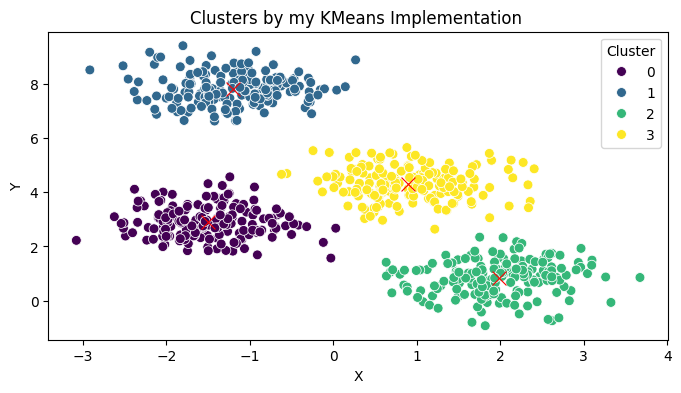

In [7]:
# Visualize the clusters for custom KMeans using seaborn
sns_plot_clusters(X, my_labels, my_centroids, "Clusters by my KMeans Implementation ")



## Step 2.2: Use X as the parameter as input to KMeans as implemented in scikit-learn


In [8]:
# Use the KMeans from scikit-learn
sklearn_kmeans = SKLearnKMeans(n_clusters=4, max_iter=100, random_state=0)
sklearn_labels = sklearn_kmeans.fit_predict(X)

/Users/mcuallen/opt/anaconda3/envs/introtoai/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


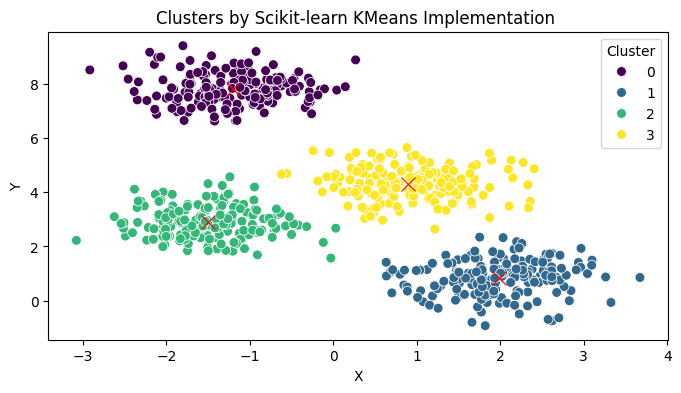

In [9]:


# Visualize the clusters for scikit-learn KMeans using seaborn
sns_plot_clusters(X, sklearn_labels, sklearn_kmeans.cluster_centers_, "Clusters by Scikit-learn KMeans Implementation ")


## Step 2.3: Performance Comparison

By referring to the [Clustering performance evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation), we can see that there are several metrics to evaluate the performance of clustering algorithms. Here I choose Adjusted Rand Index and Normalized Mutual Information to compare the performance of the two implementations. Both ARI and NMI are in the range of [0, 1], and the higher the value, the better the clustering result. Given they are both very close to 1, we can conclude that the two implementations have good performance.

In [10]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari_score = adjusted_rand_score(cluster_assignments, sklearn_labels)
nmi_score = normalized_mutual_info_score(cluster_assignments, sklearn_labels, average_method='arithmetic')

print(f"Adjusted Rand Index: {ari_score}")
print(f"Normalized Mutual Information: {nmi_score}")



Adjusted Rand Index: 0.9961850080391301
Normalized Mutual Information: 0.9936471967946069


In [11]:
ari_score = adjusted_rand_score(cluster_assignments, my_labels)
nmi_score = normalized_mutual_info_score(cluster_assignments, my_labels, average_method='arithmetic')

print(f"Adjusted Rand Index: {ari_score}")
print(f"Normalized Mutual Information: {nmi_score}")



Adjusted Rand Index: 0.9961850080391301
Normalized Mutual Information: 0.9936471967946069


We can also visualize the original cluster_assignments and see the two implementations have similar results.

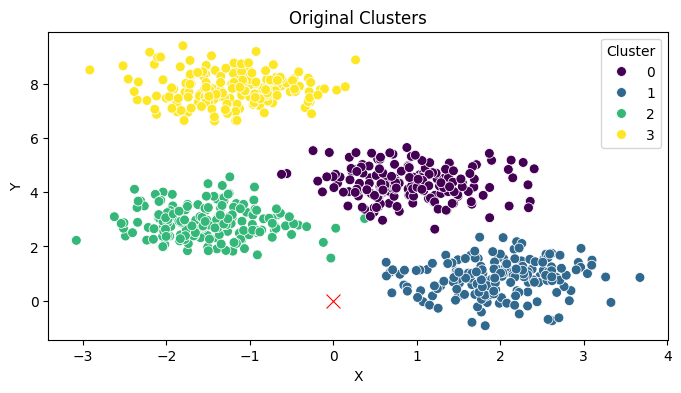

In [12]:
sns_plot_clusters(X, cluster_assignments, [[0,0]], "Original Clusters")


In [13]:
my_centroids

[[-1.4997094181421273, 2.905741940858995],
 [-1.2040579337244177, 7.837858432492295],
 [1.9877063026473274, 0.8318857877497887],
 [0.9004393234899268, 4.32217463716]]

For the output of the centroids, we can do a comparison between the two centroid sets. We can see that the two sets of centroids are very close to each other, which means the two implementations have similar results.

In [14]:
my_centroids.sort()
sklearn_centroids = sorted(sklearn_kmeans.cluster_centers_.tolist())

diff_centroids = np.array(my_centroids) - np.array(sklearn_centroids)
print(my_centroids)
print(sklearn_centroids)
diff_centroids


[[-1.4997094181421273, 2.905741940858995], [-1.2040579337244177, 7.837858432492295], [0.9004393234899268, 4.32217463716], [1.9877063026473274, 0.8318857877497887]]
[[-1.4997094181421282, 2.905741940858994], [-1.2040579337244182, 7.837858432492295], [0.9004393234899273, 4.322174637160002], [1.9877063026473274, 0.8318857877497878]]


array([[ 8.88178420e-16,  8.88178420e-16],
       [ 4.44089210e-16,  0.00000000e+00],
       [-4.44089210e-16, -1.77635684e-15],
       [ 0.00000000e+00,  8.88178420e-16]])

# Step 3: Choose and run clustering algorithms

In [15]:
from sklearn.cluster import DBSCAN

This table represents the relationship between the precision of decimal degrees in latitude/longitude and the corresponding approximate distance in meters. We'll use it to choose the hyperparameters for DBSCAN.

| Decimal places | Decimal degrees | Distance (meters) | Notes |
|----------------|-----------------|-------------------|-------|
| 0              | 1.0             | 110,574.3         | 111 km |
| 1              | 0.1             | 11,057.43         | 11 km |
| 2              | 0.01            | 1,105.74          | 1 km |
| 3              | 0.001           | 110.57            |       |
| 4              | 0.0001          | 11.06             |       |
| 5              | 0.00001         | 1.11              |       |
| 6              | 0.000001        | 0.11              | 11 cm |
| 7              | 0.0000001       | 0.01              | 1 cm |
| 8              | 0.00000001      | 0.001             | 1 mm |


## Step 3.1: Chicago taxi data


In [16]:
import pandas as pd
df = pd.read_csv("Taxi_Trips__2013-2023_b.csv", usecols=['Pickup Centroid Latitude', 'Pickup Centroid Longitude'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pickup Centroid Latitude   95657 non-null  float64
 1   Pickup Centroid Longitude  95657 non-null  float64
dtypes: float64(2)
memory usage: 1.6 MB


In [17]:
df = df.dropna(subset=['Pickup Centroid Latitude', 'Pickup Centroid Longitude'])
df.rename(columns={'Pickup Centroid Latitude': 'Latitude', 'Pickup Centroid Longitude': 'Longitude'}, inplace=True)

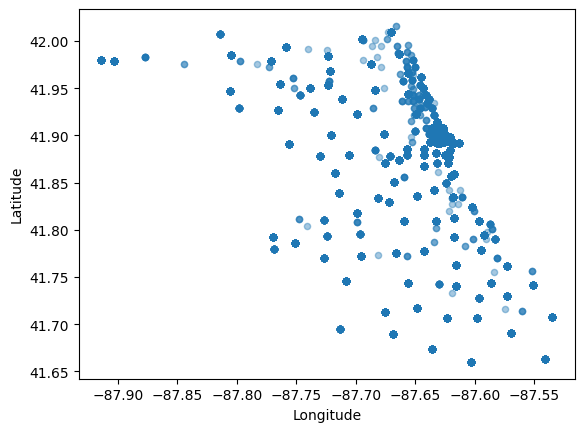

In [18]:
import matplotlib.pyplot as plt
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4)
plt.show()

In [19]:

df_cleaned = df.drop_duplicates()
df_cleaned.info()



<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 99055
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   213 non-null    float64
 1   Longitude  213 non-null    float64
dtypes: float64(2)
memory usage: 5.0 KB


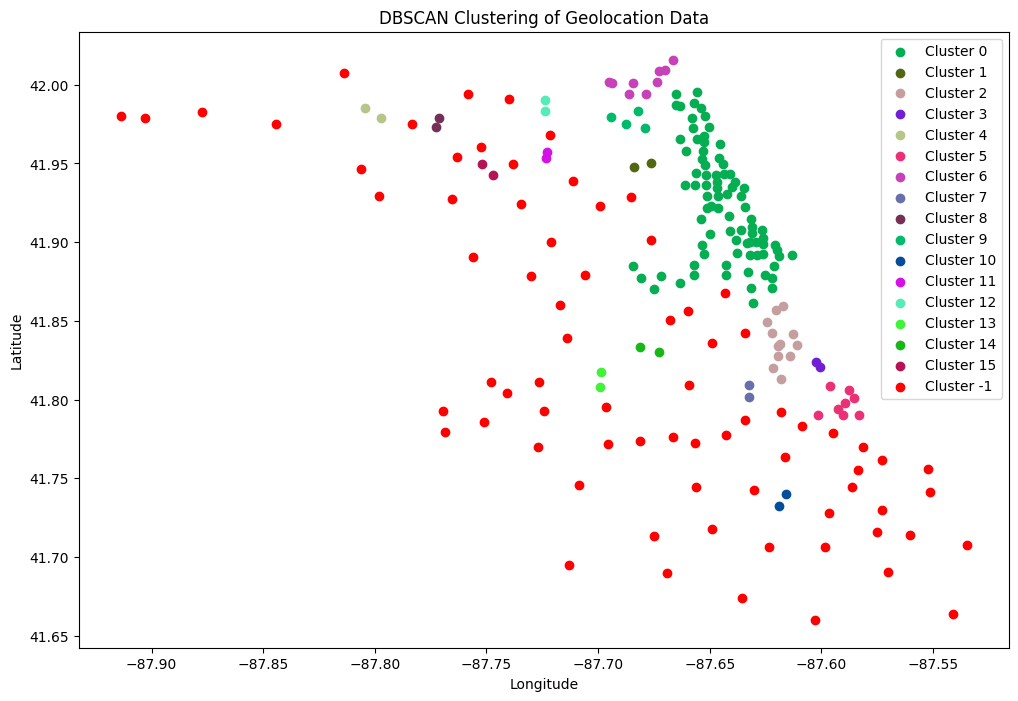

16

In [20]:
db = DBSCAN(eps=0.01, min_samples=2).fit(df_cleaned)

# Retrieve labels (each cluster is assigned a unique integer, -1 indicates noise/outliers)
labels = db.labels_

# Number of clusters (ignoring noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Create a scatter plot for the clusters
plt.figure(figsize=(12, 8))

# Plot clusters
for cluster_id in set(labels):
    if cluster_id == -1:
        # Plot outliers marked with red
        color = 'r'
    else:
        # Generate a random color for the cluster
        color = np.random.rand(3,)
    plt.scatter(df_cleaned.loc[labels == cluster_id, 'Longitude'],
                df_cleaned.loc[labels == cluster_id, 'Latitude'],
                c=[color], label=f'Cluster {cluster_id}')

plt.title('DBSCAN Clustering of Geolocation Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Output the number of clusters found
n_clusters

Answer questions here:
1. The reason why you chose the clustering algorithm(s).
>DBSCAN was chosen because it is particularly good for data which contains clusters of similar density. It does not require specifying the number of clusters beforehand, which is fit since the number of taxi clusters is not known in advance. DBSCAN is also robust to outliers, making it suitable for real-world geolocation data, which often contains noise. As we can see from the scatter plot, the geolocation data contains clusters of varying density and outliers, which makes DBSCAN a good choice for this dataset.

2. Any pre-processing of the data or any hyperparameter settings
> The data was pre-processed to remove any missing values and duplicates.
> The hyperparameters used for DBSCAN were as follows:

hyperparameter | value | reason
--- | --- | ---
eps | 0.01 | The value of eps was chosen based on the distance between the points in the scatter plot
min_samples | 2 | The value of min_samples was chosen based on the minimum number of points required to form a cluster

3. Output from the algorithm(s) -- show what clusters were generated
> DBSCAN generated 16 clusters, as well as a number of outliers which were marked in red in the scatter plot.

4. The metrics you used to evaluate the output. What kind of performance did you get from
that algorithm? Is that what you expected?
> As talked, the evaluation is more subjective. With the scatter plot, we can see that the clusters are generated based on the density of the data points. The algorithm is able to identify clusters of varying density and outliers, which is what we expected from DBSCAN. The high density areas can be identified to do further analysis, like how to allocate more taxis to these areas, how to optimize the routes, etc.

## Step 3.2: Mopsi data subset


In [21]:
mopsi_data = pd.read_csv("MopsiLocationsUntil2012-Finland.txt", sep='\t', header=None, names=['Latitude', 'Longitude'])
mopsi_data['Latitude'] /= 10000.0
mopsi_data['Longitude'] /= 10000.0
mopsi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13467 entries, 0 to 13466
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   13467 non-null  float64
 1   Longitude  13467 non-null  float64
dtypes: float64(2)
memory usage: 210.5 KB


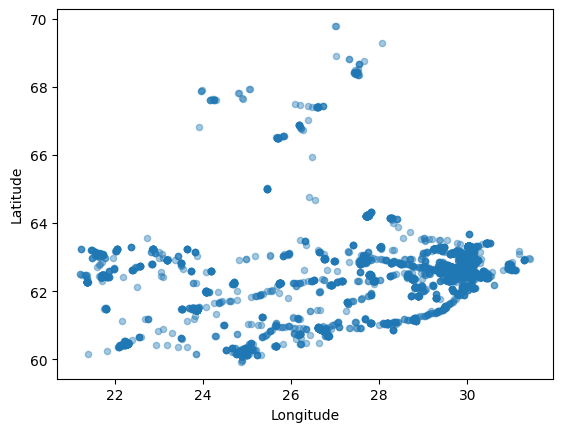

In [22]:
import matplotlib.pyplot as plt
mopsi_data.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4)
plt.show()

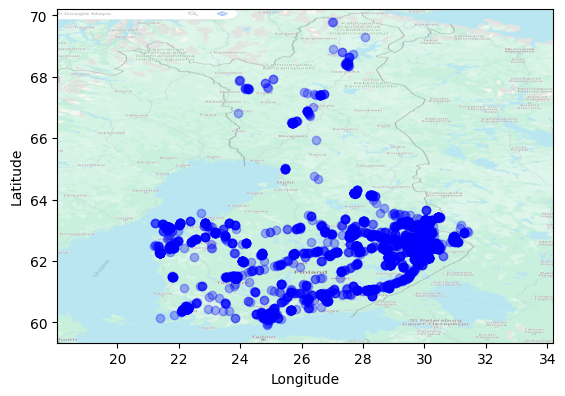

In [23]:
import matplotlib.image as mpimg
finland_img = mpimg.imread('Finland.png')

# Set up the figure size to match the aspect ratio of the picture provided
fig, ax = plt.subplots()

# Plotting the Mopsi data on top of the map image
# The alpha parameter is set to 0.3 for the scatter to ensure the map is visible through the points
scatter = ax.scatter(mopsi_data['Longitude'], mopsi_data['Latitude'], alpha=0.3, c='blue')

# Overlaying the Finland map image using the extent provided
ax.imshow(finland_img, extent=[18.03509, 34.18819, 59.33944, 70.19598], alpha=0.5)
# ax.imshow(finland_img, extent=[5.83941, 43.20773, 58.95251, 70.31182], alpha=0.5)
# Set the x and y labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 11829 entries, 0 to 13464
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   11829 non-null  float64
 1   Longitude  11829 non-null  float64
dtypes: float64(2)
memory usage: 277.2 KB


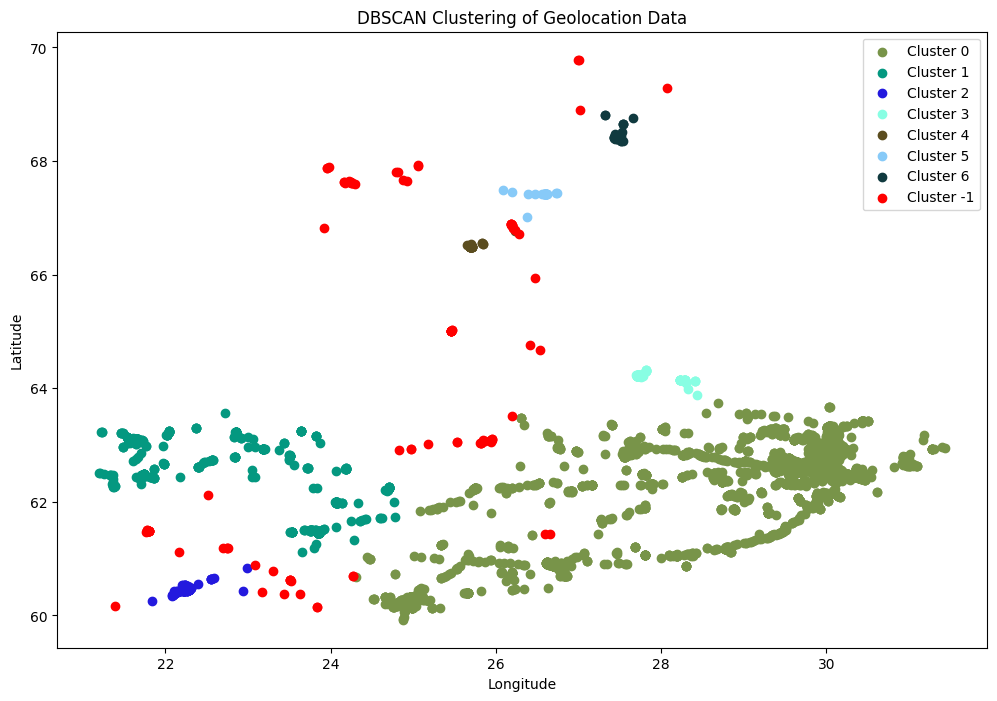

7

In [24]:
df_cleaned = mopsi_data.drop_duplicates()
df_cleaned.info()
db = DBSCAN(eps=0.45, min_samples=20).fit(df_cleaned)

# Retrieve labels (each cluster is assigned a unique integer, -1 indicates noise/outliers)
labels = db.labels_

# Number of clusters (ignoring noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Create a scatter plot for the clusters
plt.figure(figsize=(12, 8))

# Plot clusters
for cluster_id in set(labels):
    if cluster_id == -1:
        # Plot outliers marked with red
        color = 'r'
    else:
        # Generate a random color for the cluster
        color = np.random.rand(3,)
    plt.scatter(df_cleaned.loc[labels == cluster_id, 'Longitude'],
                df_cleaned.loc[labels == cluster_id, 'Latitude'],
                c=[color], label=f'Cluster {cluster_id}')

plt.title('DBSCAN Clustering of Geolocation Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Output the number of clusters found
n_clusters

Answer questions here:
1. The reason why you chose the clustering algorithm(s).
> Dataset MopsiLocationsUntil2012-Finland.txt is still a geolocation data, and it is similar to the Chicago taxi data. DBSCAN was chosen with the same reason as the Chicago taxi data.

2. Any pre-processing of the data or any hyperparameter settings
> The data was pre-processed to remove any missing values and duplicates. Especially, the latitude and longitude were divided by 10000.0 to get the correct values.
> The hyperparameters used for DBSCAN were as follows:

hyperparameter | value | reason
--- |-------| ---
eps | 0.45  | The value of eps was chosen based on the distance between the points in the scatter plot. The value is larger than the Chicago taxi data, because it is a larger area.
min_samples | 20    | The value of min_samples was chosen based on the minimum number of points required to form a cluster

3. Output from the algorithm(s) -- show what clusters were generated
> DBSCAN generated 7 clusters, as well as a number of outliers which were marked in red in the scatter plot.

4. The metrics you used to evaluate the output. What kind of performance did you get from
that algorithm? Is that what you expected?
> The vast majority of the population in Finland is concentrated in the southern part of the country, and the clusters generated by DBSCAN reflect this. The algorithm is able to identify clusters of varying density and outliers, which is what we expected from DBSCAN. Finland's climate varies from humid continental in the south to boreal in the north.

# Step 4: Extend K-Means Functionality

My idea is to prepare k slots, and then assign each point to the closest centroid(slot), similar idea as Round Robin
After n iterations, we will fill the k slots. Then we can assign the label to each point based on the slot it is in.

the main idea is as follows:
```python
        n = len(X)
        visited = set()
        slots = [[] for _ in range(self.k)] #  each list contains the indices of the points in the cluster
        labels = [0] * len(X)
        for i in range(n):
            cur_centroiids = self.centroids[i % self.k]
            distances = []
            for j in range(n):
                if j in visited:
                    distances.append(float('inf'))
                else:
                    distances.append(np.linalg.norm(np.array(X[j]) - np.array(cur_centroiids)))
            min_index = distances.index(min(distances))
            visited.add(min_index)
            slots[i % self.k].append(min_index)

        #print(slots)
        for i in range(self.k):
            for idx in slots[i]:
                labels[idx] = i
```
